In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pickle

In [34]:
dataset = pd.read_csv("flightdata.csv")

In [35]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [37]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [38]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [39]:
dataset["DEST"].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

Text(0.5, 1.0, 'Scatter Plot Between ARR_DELAY and ARR_DEL15')

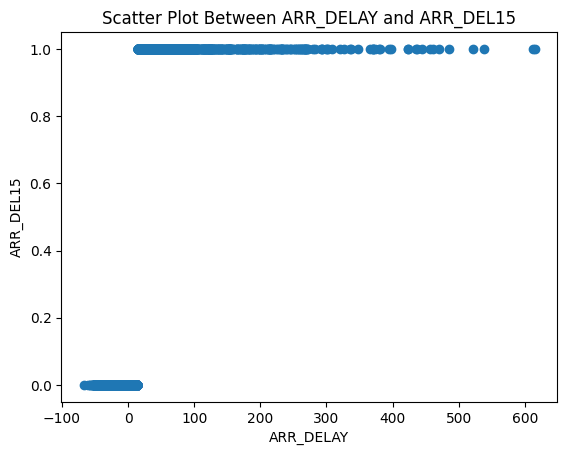

In [40]:
plt.scatter(dataset['ARR_DELAY'], dataset['ARR_DEL15'])
plt.xlabel('ARR_DELAY')
plt.ylabel("ARR_DEL15")
plt.title('Scatter Plot Between ARR_DELAY and ARR_DEL15')

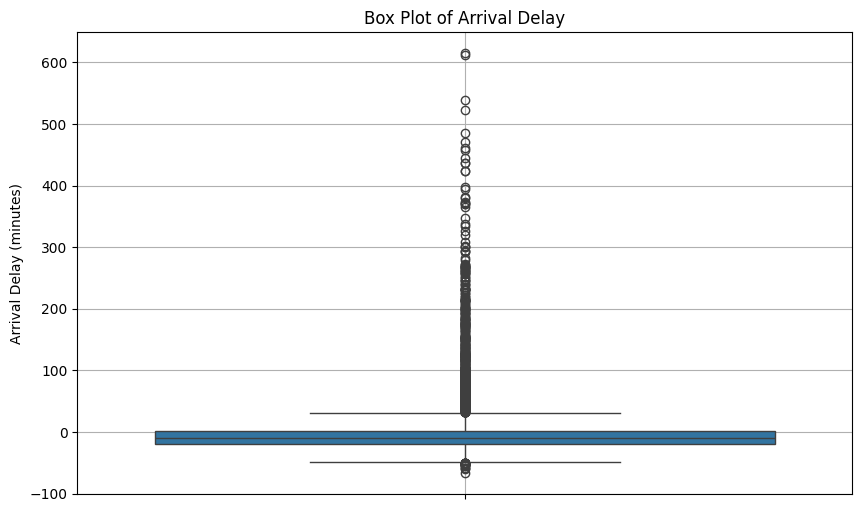

In [42]:
# Create boxplot for ARR_DELAY
plt.figure(figsize=(10, 6))
sns.boxplot(y=dataset['ARR_DELAY'])
plt.title("Box Plot of Arrival Delay")
plt.ylabel("Arrival Delay (minutes)")
plt.grid(True)
plt.show()


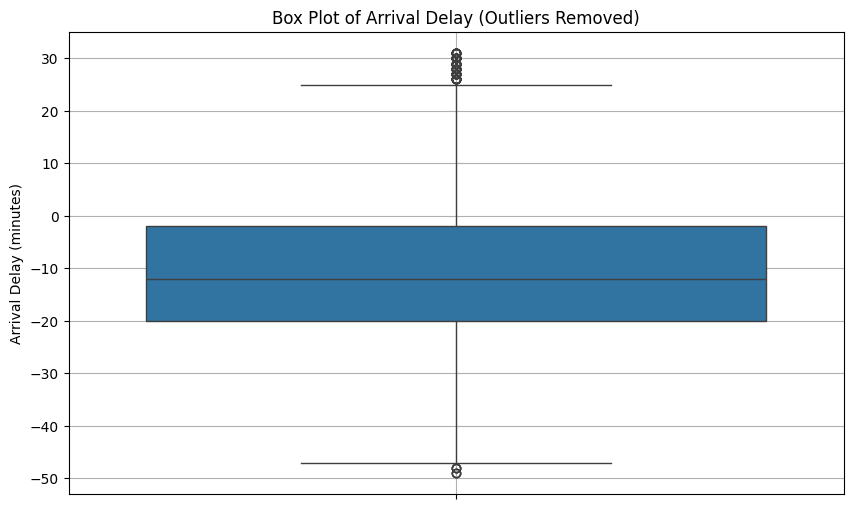

In [43]:
# Step 1: Calculate IQR
Q1 = df['ARR_DELAY'].quantile(0.25)
Q3 = df['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_clean = df[(df['ARR_DELAY'] >= lower_bound) & (df['ARR_DELAY'] <= upper_bound)]

# Step 4: Re-plot the cleaned boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_clean['ARR_DELAY'])
plt.title("Box Plot of Arrival Delay (Outliers Removed)")
plt.ylabel("Arrival Delay (minutes)")
plt.grid(True)
plt.show()

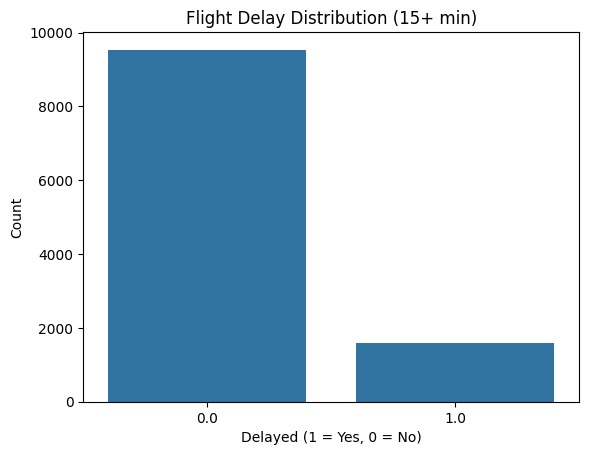

In [44]:
#  Target Distribution (Flight Delay or Not)
sns.countplot(x='DEP_DEL15', data=dataset)
plt.title('Flight Delay Distribution (15+ min)')
plt.xlabel('Delayed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

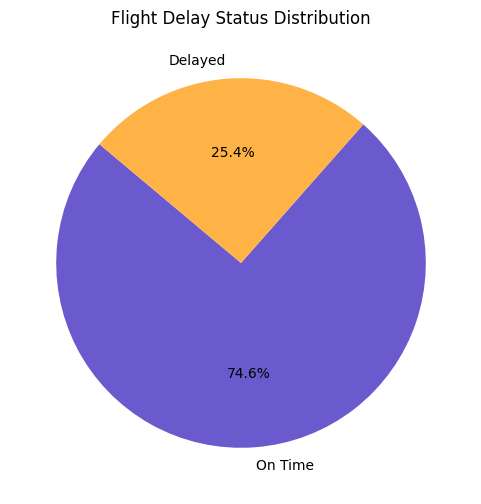

In [45]:
# Create a binary column for delay status
df['DELAY_STATUS'] = df['ARR_DELAY'].apply(lambda x: 'Delayed' if x > 0 else 'On Time')

# Count each category
status_counts = df['DELAY_STATUS'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#6a5acd', '#ffb347'])
plt.title("Flight Delay Status Distribution")
plt.show()

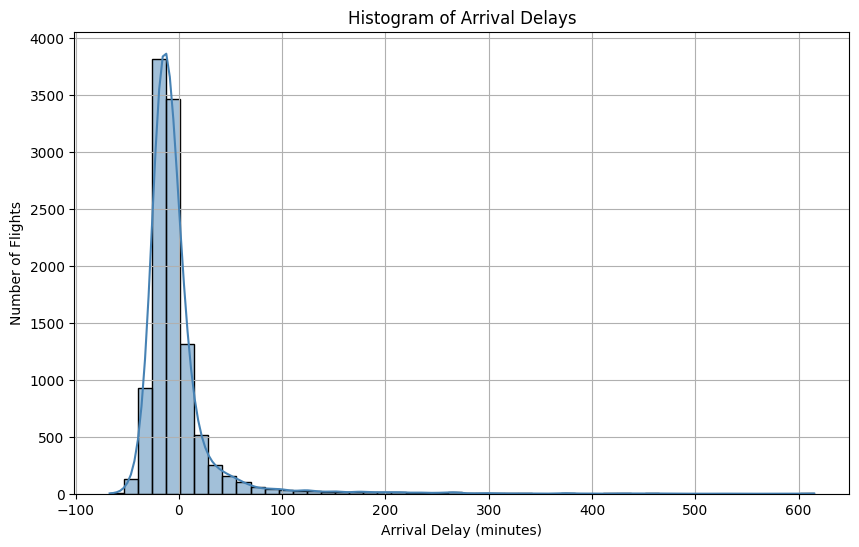

In [46]:
# Histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], bins=50, kde=True, color='steelblue')
plt.title("Histogram of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.show()


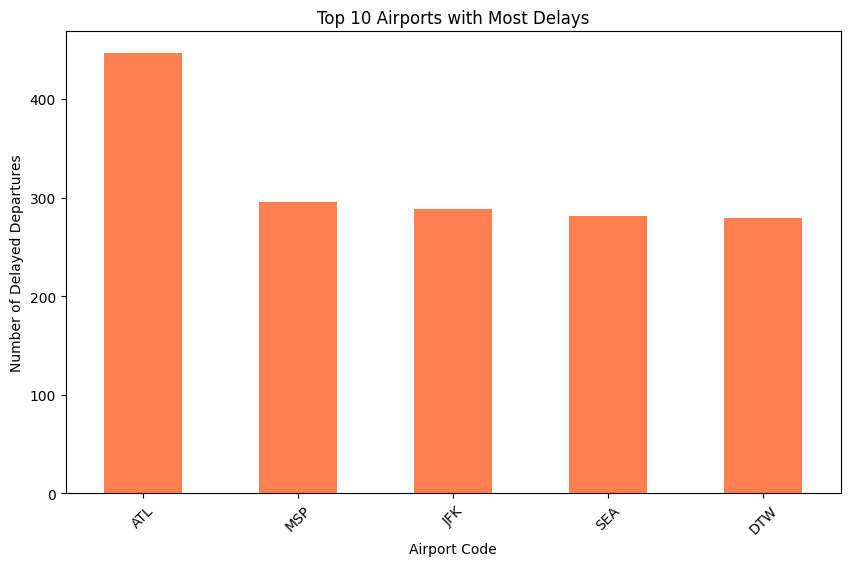

In [47]:
# Top 10 Airports by Delay Count
top_origins = dataset.groupby('ORIGIN')['DEP_DEL15'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_origins.plot(kind='bar', color='coral')
plt.title('Top 10 Airports with Most Delays')
plt.ylabel('Number of Delayed Departures')
plt.xlabel('Airport Code')
plt.xticks(rotation=45)
plt.show()


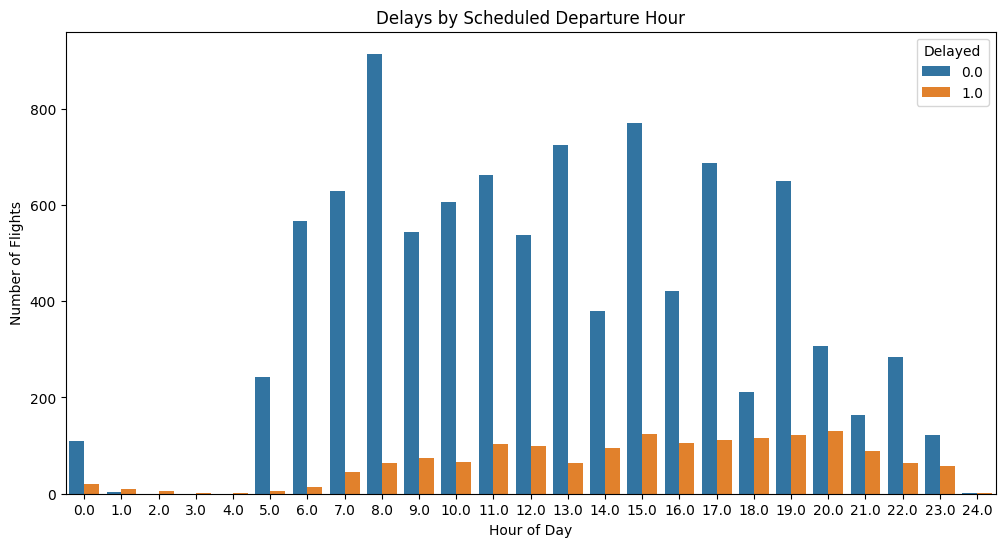

In [48]:
# Delay by Departure Hour (if you extract hour)
dataset['DEP_HOUR'] = dataset['DEP_TIME'] // 100  # Extract hour part

plt.figure(figsize=(12,6))
sns.countplot(x='DEP_HOUR', hue='DEP_DEL15', data=dataset)
plt.title('Delays by Scheduled Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.legend(title='Delayed')
plt.show()


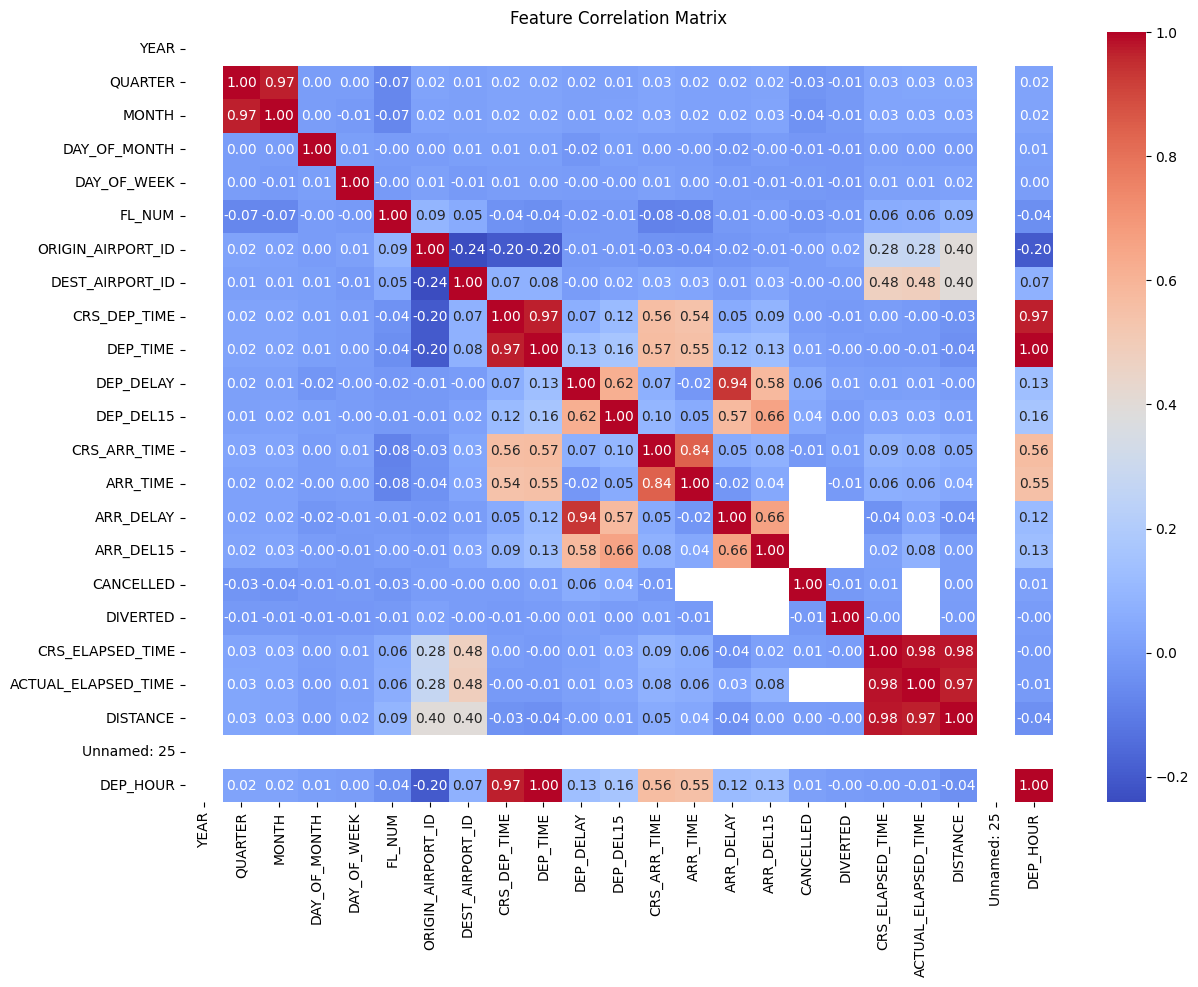

In [49]:
# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [50]:
dataset = dataset.drop('Unnamed: 25', axis = 1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
DEP_HOUR               107
dtype: int64

In [51]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN","DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [52]:
dataset = dataset.fillna({'ARR_DEL15' : 1})
dataset = dataset.fillna({'DEP_DEL15' : 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [53]:
import math 
for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [54]:
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [55]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [56]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values
x.shape

(11231, 8)

In [57]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [58]:
oh = OneHotEncoder()
z = oh.fit_transform(x[:, 4:5]).toarray()
t = oh.fit_transform(x[:, 5:6]).toarray()

In [59]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [60]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [61]:
x = np.delete(x,[4,5], axis = 1)
x.shape

(11231, 6)

In [62]:
x = np.concatenate((t,z,x), axis = 1)
x.shape

(11231, 16)

In [63]:
dataset = pd.get_dummies(dataset , columns = ['ORIGIN', 'DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,14,0.0,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,12,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,13,0.0,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,6,0.0,0.0,False,False,False,False,True,False,True,False,False,False


In [64]:
y = dataset.iloc[:, 5:6].values

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [66]:
x_test.shape

(2247, 16)

In [67]:
x_train.shape

(8984, 16)

In [68]:
y_test.shape

(2247, 1)

In [69]:
y_train.shape

(8984, 1)

In [70]:
import imblearn
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [72]:
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=0)

In [73]:
decisiontree = classifier.predict(x_test)

In [74]:
acc = accuracy_score(y_test, decisiontree)
acc

1.0

In [75]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, decisiontree)

In [76]:
cm

array([[1938,    0],
       [   0,  309]])

In [80]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 1.0


In [82]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8446817979528259


C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [84]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 1.0


C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0
Naive Bayes Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1938
         1.0       1.00      1.00      1.00       309

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247



C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.8624833110814419
SVM Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1938
         1.0       0.00      0.00      0.00       309

    accuracy                           0.86      2247
   macro avg       0.43      0.50      0.46      2247
weighted avg       0.74      0.86      0.80      2247



C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yagnatharun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = rf.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Accuracy: 1.0
Confusion Matrix:
 [[1938    0]
 [   0  309]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1938
         1.0       1.00      1.00      1.00       309

    accuracy                           1.00      2247
   macro avg       1.00      1.00      1.00      2247
weighted avg       1.00      1.00      1.00      2247



In [93]:
# Predictions from all models (must run these first!)

y_pred_dt = classifier.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_svm = svm.predict(x_test)


In [94]:
from sklearn.metrics import accuracy_score

model_scores = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm)
}


                 Model  Accuracy
0        Decision Tree  1.000000
1        Random Forest  1.000000
2                  KNN  0.844682
3  Logistic Regression  1.000000
4          Naive Bayes  1.000000
5                  SVM  0.862483


C:\Users\yagnatharun\AppData\Local\Temp\ipykernel_18672\2887528526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="crest")


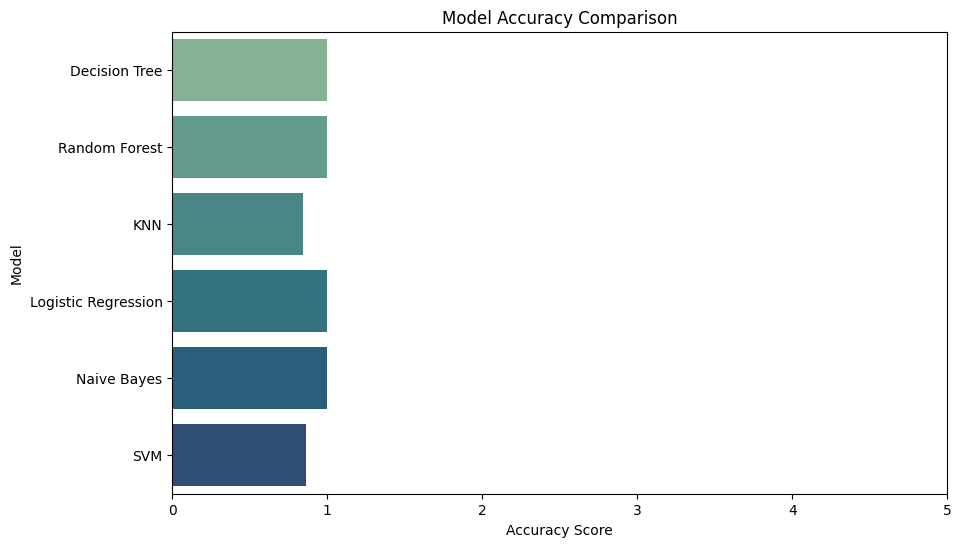

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Accuracy"])

# Print table
print(results_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="crest")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.xlim(0, 5)
plt.show()


In [99]:
import pickle
pickle.dump(classifier, open("flight.pkl", "wb"))